<a href="https://colab.research.google.com/github/brayannmb/projeto_airbnb/blob/main/Analisando_os_Dados_do_Airbnb_Londres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Londres

--------------------------------------------------------------

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img width="70%" src="https://github.com/brayannmb/projeto_airbnb/blob/main/banner_londres.png?raw=true"
></center>

##**Londres**
Localizada nas margens do **Rio Tâmisa**, a cidade de Londres é considerada a maior cidade do Reino Unido, destacando-se nas áreas de finanças, industriais, tecnológicas e com grande **destaque no turismo**, onde foi considerada a **3ª cidade mais visitada do mundo em 2019 (antes da Covid-19)**, segundo o site [Melhores Destinos](https://www.melhoresdestinos.com.br/cidades-mais-visitadas-do-mundo.html).

Talvez você já tenha ouvido falar sobre a belíssima residência onde a **Rainha Elizabeth** vive, sim eu estou falando do Palácio de Buckingham, mas você sabia que é possível visita-lo durante algumas épocas do ano? Ou você sabia que entre os meses de Maio e Julho é possível assistir a troca da guarda real? Eu falo a vocês que sim, tudo isso é possível!

Além dessas atrações não poderia deixar de mencionar o **Big Ben, Tower Bridge, Oxford Street, Abádia de Westminster** e os elegantes museus da cidade inglesa.

Bom, já sabemos que Londres é um grande polo turistico do mundo, mas quais informações nós poderiamos adquirir relizando a análise dos Dados do Airbnb de Londres?

**Algumas informações que iremos extrair desta análise:**
* O tipo de propriedade mais alugada em Londres no Airbnb
* Os bairros mais caros e mais baratos da cidade Inglesa
* Mínimo de noites exigidas 

Entre outras, como alguns insights mais técnicos, convido você a me acompanhar nesta análise.


**Neste *notebook*, iremos analisar os dados referentes à cidade Londres, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Acessar o *dataset* através do link do próprio site é uma **boa prática**, pois é possível para quem está acessando o *notebook* entenda onde está armazenado estes dados. Mas a dica é também **ter uma cópia** deste *dataset* na nuvem, respositório no GitHub, ou até mesmo localmente, para que caso o site saia do ar, você não perca a sua análise.

Neste *notebook* utilizaremos a biblioteca Pandas para obter, analisar e manipular os dados. As bibliotecas Matplotlib e Seaborn para plotagem de gráficos, alguns como histogramas e boxplots. 


In [ ]:
# importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importando o arquivo listings.csv para um DataFrame

df = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2020-12-16/visualisations/listings.csv')

## Análise dos Dados
Primeiro vamos entender quais variáveis estão presentes no nosso *dataset*. O dicionário de variáveis é uma maneira para ajudar quem está lendo o *notebook* e não tem muito conhecimento sobre os dados apresentados.

**Dicionário das variáveis**

* `id` número de id gerado para identificar o imóvel
* `name` nome da propriedade anunciada
* `host_id` id gerado para o proprietário do imóvel
* `host_name` nome do anfitrião do imóvel
* `neighbourhood_group` esta coluna não contém nenhum dado válido para análise
* `neighbourhood` bairro onde está localizado o imóvel
* `latitude` coordenada de latitude do imóvel
* `longitude` coordenada de longitude do imóvel
* `room_type` informa o tipo de propriedade
* `price` preço para alugar esta propriedade
* `minimum_nights` noites mínimas de permanência na propriedade
* `number_of_reviews` número de reviews que a propriedade possui
* `last_review` data do último review da propriedade
* `reviews_per_month` quantidade de reviews por mês 
* `calculated_host_listings_count` quantidade de imóveis do mesmo anfitrião
* `availability_365` número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas utilizando o comando `head()`.

In [ ]:
# 5 primeiras entradas do dataset

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,105,2,192,2020-03-26,1.46,2,338
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,40,1,21,2020-02-22,0.17,2,365
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,10,89,2020-03-16,0.66,1,189
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,42,2019-11-02,0.35,15,231
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364


Apenas com a primeira visualização do *dataset* é possível enxergar uma **predominância** de valores ausentes **(NaN)** na coluna `neighbourhood_group`. Mas ainda não podemos tirar hipóteses precipitadas, então analisaremos o *dataset* mais afundo para melhores conclusões.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
É necessário entender com o que estamos trabalhando, qual é o tamanho do nosso *dataset*, conhecer tipo das variáveis presentes.

Com o comando `info()` conseguimos visualizar o total de entradas, colunas, tipos das variáveis, memória usada e a quantidade de valores ausentes. Este comando nos ajuda a ter uma produtividade maior na análise, pois somente com um linha de código conseguimos verificar 4 informações essenciais para o nosso estudo sobre com o que estamos trabalhando. 


In [ ]:
# volume de dados do DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77136 entries, 0 to 77135
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              77136 non-null  int64  
 1   name                            77112 non-null  object 
 2   host_id                         77136 non-null  int64  
 3   host_name                       77095 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   77136 non-null  object 
 6   latitude                        77136 non-null  float64
 7   longitude                       77136 non-null  float64
 8   room_type                       77136 non-null  object 
 9   price                           77136 non-null  int64  
 10  minimum_nights                  77136 non-null  int64  
 11  number_of_reviews               77136 non-null  int64  
 12  last_review                     

Executando o comando `info()` conseguimos extrair as seguintes informações sobre o *dataset*:

* 77.136 entradas (entries)
* 16 colunas (columns)
* 3 tipos de dados diferentes (dtypes), são eles: float64, int e infelizmente o tipo **object**
* Memory usage 9.4 MB

Já foi possível visualizar que a coluna `neighbourhood` **não contém valores válidos para a nossa análise**, estavámos corretos na nossa hipotése.

Após executar o comando `info()` conseguimos visualizar que a coluna `last_review` está com seu tipo de dado como *object*, para nós, isso não é muito bom, por se tratar de dados que o Python não conseguiu definir seu tipo, ainda mais se tratando de uma coluna que possuí datas de ultimas *reviews*.

Com sorte, em Python facilmente conseguimos transformar a coluna `last_review` para o tipo DateTime. Através do comando `pd.to_datetime()`é possível fazer esta transformação.


In [ ]:
#transformando tipo object em tipo DateTime

df['last_review'] = pd.to_datetime(df['last_review'], format="%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77136 entries, 0 to 77135
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              77136 non-null  int64         
 1   name                            77112 non-null  object        
 2   host_id                         77136 non-null  int64         
 3   host_name                       77095 non-null  object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   77136 non-null  object        
 6   latitude                        77136 non-null  float64       
 7   longitude                       77136 non-null  float64       
 8   room_type                       77136 non-null  object        
 9   price                           77136 non-null  int64         
 10  minimum_nights                  77136 non-null  int64         
 11  nu

Nota-se que quando executamos o comando `info()` novamente, a coluna `last_review` já teve o seu tipo alterado.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Confirmando nossa análise um pouco acima sobre a coluna `neighbourhood_group` que contém **100% dos seus dados ausentes**, aqui também é possível enxergar uma porcentagem de quase **30% dos dados** nas colunas `reviews_per_month` e `last_review` são valores ausentes.

In [ ]:
# ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.290798
last_review                       0.290798
host_name                         0.000532
name                              0.000311
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

In [ ]:
df.shape[0]

77136

O comando utilizado `isnull()` faz uma verificação em todo o nosso *dataset* procurando valores ausentes, logo após fazemos a soma destes valores através do comando `sum()`, resultando a quantidade de valores ausentes. Fazendo a divisão sobre a o total de entradas temos a porcentagem.

### **Q3. Qual o tipo de distribuição das variáveis?** 

De maneira simples, podemos utilizar histogramas para a visualizar a distribuição das variáveis numéricas presentes em nosso *dataset*.

Após plotar estes histogramas conseguimos identificar possíveis outliers nas colunas `price`, `minimum_nights` e `calculated_host_listings_count`. Como por exemplo um anfitrião ter mais de **800 propriedades**, quantidade de noites mínimas na propriedade ser **mais de 1000** ou o preço de um aluguel ser **15.000 libras**.

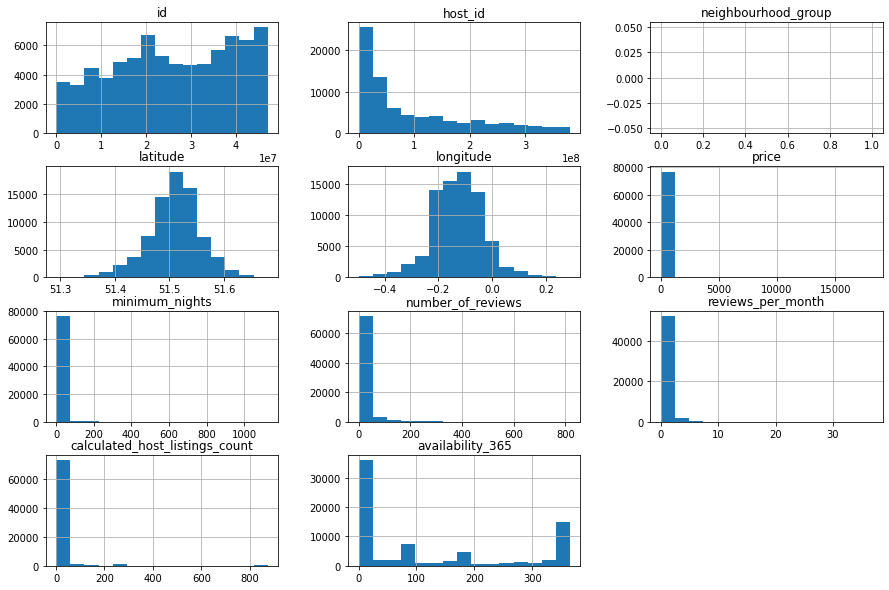

In [ ]:
# histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));


Algumas variáveis não nos importam tanto, elas não tem muita utilidade, pois são variáveis de identificação do anfitrião, como o seu `host_id`, `host_name` e também a variável `id` que é gerada apenas pra identificar o imóvel. 

### **Q4. Existem *outliers* presentes?**
Através das análises feitas até aqui, tivemos indícios de possíveis *outliers* no *dataset*, para que podemos melhorar nossas hipóteses que realmente existem *outliers*, temos duas maneiras rápidas:

1. Resumo estatístico com o comando `describe()`
2. Através da criação de boxplots

Para tratar estes dados, podemos utilizar o método IQR para definição de limites inferiores e superiores.

**Primeiramente, vamos análisar dados estatísticos básicos executando o comando `describe()`:**

In [ ]:
# analisando somente colunas mais relevantes
df[['price', 'minimum_nights', 'calculated_host_listings_count', 'number_of_reviews', 'reviews_per_month', 'availability_365']].describe()


,price,minimum_nights,calculated_host_listings_count,number_of_reviews,reviews_per_month,availability_365
count,77136.000000,77136.000000,77136.000000,77136.000000,54705.000000,77136.000000
mean,120.569773,5.180564,20.686631,15.283823,0.607957,122.106046
std,412.539458,22.401630,98.922987,35.440263,0.865626,144.228420
min,0.000000,1.000000,1.000000,0.000000,0.010000,0.000000
25%,44.000000,1.000000,1.000000,0.000000,0.110000,0.000000
50%,75.000000,2.000000,1.000000,3.000000,0.320000,57.000000
75%,127.000000,3.000000,4.000000,14.000000,0.780000,262.000000
max,18175.000000,1125.000000,874.000000,817.000000,36.830000,365.000000


De acordo com o resultado estatístico acima, podemos confirmar algumas hipóteses:

* A variável `price` possui **75%** dos valores sendo de até **127 libras**, mas seu valor máximo é de **18.175 libras**
* Na variável `price` temos o valor mínimo sendo **0 libras**, o que certamente não condiz com a realidade
* A variável `minimum_nights` possuí **75%** dos valores sendo **3 noites**, porém o valor máximo é de **1.125 noites** (aproximadamente 3 anos e 1 mês)
* Utilizando da mesma linha pensamento, é possível enxergar *outliers* nas colunas `calculated_host_listings_count` e `number_of_reviews`

O comando `describe()` gera um resumo estatístico das variáveis numéricas presentes no *dataset*, sendo uma ferramenta muito prática para gerar cálculos como a quantidade entradas de cada variável, média dos valores, mediana, desvio padrão, valores mínimos e máximos.

#### **Boxplot para minimum_nights**

O gráfico boxplot é uma ótima ferramenta para verificar se existem *outliers* presentes em nosso *dataset*, pois facilmente é possível analisar o resultado. 


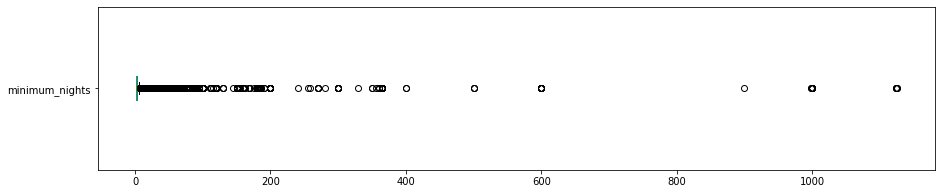

minimum_nights: valores acima de 30:
1131 entradas
1.4662%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### **Boxplot para price**

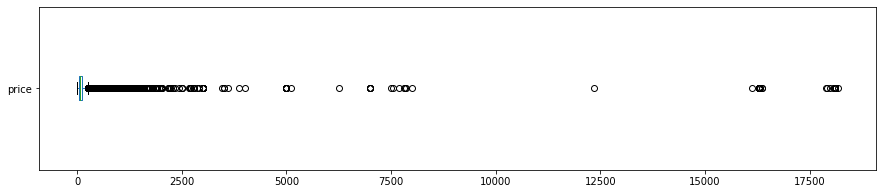


price: valores acima de 250 libras
5325 entradas
6.9034%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 250 libras")
print("{} entradas".format(len(df[df.price > 250])))
print("{:.4f}%".format((len(df[df.price > 250]) / df.shape[0])*100))

Nos gráficos boxplot, os *outliers* estão representados pelos círculos deslocados dos demais, geralmente estão deslocados a direita dos outros círculos.

#### **Limpando os dados**

Agora está na hora da faxina, para isso, vamos definir valores inferiores e superiores para que seja possível cortar os outliers, utilizarei o Método IQR para essa definição.


 

####**Método IQR**

Verificando os resultados estatísticos e os gráficos boxplots apresentados, conseguimos ver claramente que temos outliers presentes. Para tratá-los vamos seguir os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.

**A seguir, vamos definir limites para a variável `price`:**

In [ ]:
#fazendo uma cópia do df para variável df_clean
df_clean = df.copy()

#definindo valores q1 e q2
q1_price = df_clean.price.quantile(.25)
q3_price = df_clean.price.quantile(.75)

#calculando o IQR
iqr_price = q3_price - q1_price
print ("IQR:", iqr_price)

#definindo os limites inferior e superior

sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price

print("IQR superior da variável price é: ", sup_price)
print("IQR inferior da variável price é: ", inf_price)



IQR: 83.0
IQR superior da variável price é:  251.5
IQR inferior da variável price é:  -80.5


**Agora, iremos definir limites para a variável `minimum_nights`:** 

In [ ]:
#definindo valores q1 e q2
q1_night = df_clean.minimum_nights.quantile(.25)
q3_night = df_clean.minimum_nights.quantile(.75)

#calculando o IQR
iqr_night = q3_night - q1_night
print ("IQR:", iqr_night)

#definindo os limites inferior e superior
sup_night = q3_night + 1.5 * iqr_night
inf_night = q1_night - 1.5 * iqr_night

print("IQR superior da variável minimum_nights: ", sup_night)
print("IQR inferior da variável minimum_nights: ", inf_night)


IQR: 2.0
IQR superior da variável minimum_nights:  6.0
IQR inferior da variável minimum_nights:  -2.0


####**Removendo Ouliers**

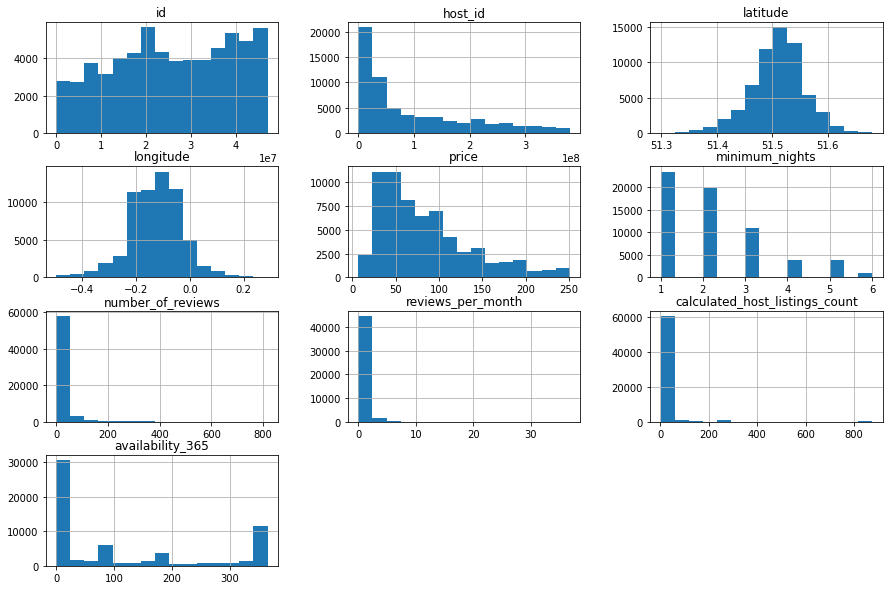

In [ ]:
#removendo outliers
df_clean.drop(df_clean[df_clean.price > 251.5].index, axis=0, inplace=True) #limpando variável price
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace=True) #limpando variável minimum_nights
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True) #limpando variável price

# removendo `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# histograma para as variáveis numéricas após a limpeza
df_clean.hist(bins=15, figsize=(15,10));

A princípio, só limpamos as variáveis `price` e `minimum_nights`, mas também poderiamos limpar as variáveis `number_of_reviews` e `calculated_host_listings_count`, mas elas não serão utilizadas em análises futuras.

**Agora sim!**

Com o *dataset* limpo, é possível enxergar a diferença entre os primeiros histogramas para estes novos, conseguimos visualizar melhor a distribuição das variáveis.

####**Comparações**
Vamos comparar a média de preços antes e depois da limpeza de dados, para saber se de fato a remoção dos temidos *outliers* teve um resultado positivo para a nossa análise. 

#####**Comparação variável price**

In [ ]:
print("A média de preços na cidade de Londres antes da limpeza de dados:" )
price_before = df.price.mean()
print(price_before)
print("Valor convertido para reais: ", df.price.mean() * 7.5)

A média de preços na cidade de Londres antes da limpeza de dados:
120.56977286869945
Valor convertido para reais:  904.2732965152459


In [ ]:
print("A média de preços na cidade de Londres depois da limpeza de dados:" )
price_after = df_clean.price.mean()
print(price_after)
print("Valor convertido para reais: ", df_clean.price.mean() * 7.5)

A média de preços na cidade de Londres depois da limpeza de dados:
84.08699933297335
Valor convertido para reais:  630.6524949973001


In [ ]:
# diferença de valores
print("Diferença de valores em libras esterlinas: ", price_before - price_after)
print("Diferença de valores em reais brasileiros: ", (price_before - price_after) * 7.5)

Diferença de valores em libras esterlinas:  36.482773535726096
Diferença de valores em reais brasileiros:  273.6208015179457


Como podemos ver, a limpeza de dados nos trouxe ganhos significativos em relação aos preços, nos ajudou a ter uma noção melhor de valores que estão sendo realmente cobrados nas propriedades em Londres.

#####**Comparação variável minimum_nights.**

In [ ]:
# média de noites antes da limpeza
print("Média de noites antes da limpeza de dados:")

df.minimum_nights.mean()

Média de noites antes da limpeza de dados:


5.180564198299108

In [ ]:
# média de noites antes da limpeza
print("Média de noites depois da limpeza de dados:")

df_clean.minimum_nights.mean()

Média de noites depois da limpeza de dados:


2.1699170981164437

Após a limpeza de dados o valor das noites mínimas exigidas cairam pela metade, novamente nos mostrando a importância em tratar *outliers* presentes no dataset.

### **Q5. Qual a correlação existente entre as variáveis?**
A correlação é algo muito útil para podermos saber se duas variáveis ou duas coisas tem uma relação positiva entre elas, no nosso contexto estamos exatamente buscando essa relação entre duas variáveis.

Para identificar correlações entre as variáveis irei primeiro criar uma matriz de correlação, após, utilizando a biblioteca `seaborn` irei plotar um gráfico heatmap a partir da matriz de correlação.

In [ ]:
# matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'calculated_host_listings_count', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()
corr

,price,minimum_nights,calculated_host_listings_count,number_of_reviews,reviews_per_month,availability_365
price,1.000000,0.181140,0.198463,-0.070524,-0.084000,0.053070
minimum_nights,0.181140,1.000000,-0.064862,-0.057404,-0.159866,-0.089091
calculated_host_listings_count,0.198463,-0.064862,1.000000,-0.054554,-0.041014,0.013774
number_of_reviews,-0.070524,-0.057404,-0.054554,1.000000,0.771813,0.107644
reviews_per_month,-0.084000,-0.159866,-0.041014,0.771813,1.000000,0.149073
availability_365,0.053070,-0.089091,0.013774,0.107644,0.149073,1.000000


####**Heatmap gerado da matriz de correlação:**

Com o gráfico Heatmap, facilita a visualização das correlações positivas e negativas. Valores mais próximos de 1 (azuis) são variavéis com correlações positivas, e as variáveis mais próximas de zero (vermelhas), ou negativas, elas tem uma correlação negativa.

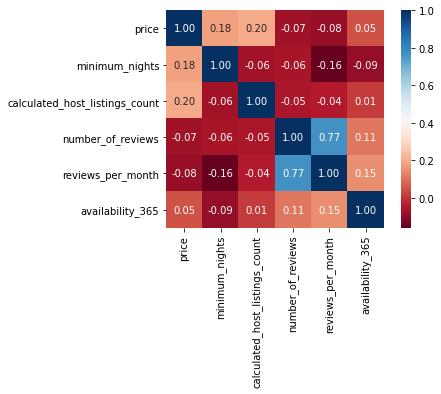

In [ ]:
# heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb de Londres?**
Utilizando o comando `value_counts()`, é possível fazer a contagem do número de cada tipo de imóvel disponível na cidade de Londres.

Analisando o código abaixo, temos `Entire home/apt` e `Private room` quase empatados, pesquisando sobre no próprio site do Airbnb, **Entire home/apt** são propriedades onde você terá um imóvel, um espaço exclusivo só para você e **Private room** são imóveis onde se tem privacidade, mas que tem espaços comuns para também conviver com outras pessoas.



> [Airbnb](https://www.airbnb.com.br/help/article/5/como-fa%C3%A7o-para-escolher-o-tipo-de-acomoda%C3%A7%C3%A3o?_set_bev_on_new_domain=1613303105_MTYwMzM4ZjEzNzA2)



In [ ]:
# quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    32337
Private room       29617
Shared room          539
Hotel room           473
Name: room_type, dtype: int64

In [ ]:
# porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.513563
Private room       0.470365
Shared room        0.008560
Hotel room         0.007512
Name: room_type, dtype: float64

Entire home com **51%** das propriedades alugadas está em primeiro na tabela, em seguida de Private Room com **47%**, depois vem Shared room e Hotel room, com menos de **1%** cada.

Podemos visualizar que os tipos de propriedades que as pessoas têm **preferência em alugar**, são Entire home/ apt e Private room.

Uma boa análise seria saber qual a média de preços nestas propriedades.



In [ ]:
# média de preços de propriedades Entire home 

df_clean.loc[(df_clean['room_type'] == "Entire home/apt")].price.mean()


115.98088876519158

In [ ]:
# média de preços de propriedades Private Room

df_clean.loc[(df_clean['room_type'] == "Private room")].price.mean()

49.67788769963197

Chegamos à conclusão de que as propriedades do tipo **Private room** com a média de **49 libras**, são mais baratas do que as propriedades do tipo **Entire home/apt** com a média de valores de **115 libras**. 

Em Londres e em todo o Reino Unido a moeda local é a libra esterlina, que no dia de hoje 21/02/2021, uma libra esterlina está custando 7,5 reais brasileiros.

Então convertendo para nossa moeda, a média das propriedades Private room estão em 367,50 reais, e a média de valores nos tipos de propriedades Entire room estão em 862,5 reais.


### **Q7. Qual a localidade mais cara do *dataset*?**
Para isso, precisamos comparar duas variáveis do nosso *dataset*, comparação da variável `neighbourhood`em relação a variável `prices`, comparando os bairros pelos seus respectivos preços, pela média de cada um.

Podemos utilizar o comando `groupby()`para fazer essa comparação, seguido dos comandos `mean()` para calcular a média e `sort_values()` para ordenar os valores em ordem decrescente.

In [ ]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
City of London            126.737609
Kensington and Chelsea    118.676959
Westminster               113.580681
Camden                     97.869917
Hammersmith and Fulham     93.410432
Richmond upon Thames       91.641989
Islington                  88.004579
Wandsworth                 87.939365
Southwark                  81.594035
Merton                     78.566406
Name: price, dtype: float64

O primeiro bairro listado foi *City of London*, mas para quem conhece a cidade de Londres, sabe que o bairro *Kensington and Chelsea* onde está localizado o famoso Palácio Kensington é um dos metros quadrados mais caros de Londres. 
Somente para efeito de curiosidade, este Palácio é uma das moradias do Príncipe William.

**Mas, por que City of London foi considerada pela análise um dos bairros mais caros?**

Vamos analisar! 

Entradas para o bairro City of London:

In [ ]:
print("Entradas:")
df_clean.loc[(df_clean['neighbourhood'] == "City of London")].shape[0]

Entradas:


343

Entradas para o bairro Kensinton and Chelsea:

In [ ]:
print("Entradas:")
df_clean.loc[(df_clean['neighbourhood'] == "Kensington and Chelsea")].shape[0]

Entradas:


3854

Comparando estes dois valores, a quantidade de entradas de City of London é aproximadamente **10x menor** do que Kensington and Chelsea. Pelo bairro City of London ter poucos registros em comparação aos outros bairros, isso acaba elevando significativamente a média dos preços. Mas ainda são **343 entradas**, e não podemos desconsidera-las, então, de acordo com este conjunto de dados em específico, City of London contém a maior média de preços.


####**Localidades mais baratas em Londres**

Agora que já sabemos as localidades mais caras, está na hora de saber sobre as mais baratas e economizar na hora da viagem!

Para descobrir sobre os bairros mais baratos, basta fazer uma alteração no comando `sort_values`, mudando o seu estado de False para True.

* True = Ordem decrescente
* False = Ordem crescente

In [ ]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10]

neighbourhood
Croydon                 54.132114
Bexley                  54.979757
Barking and Dagenham    55.487738
Sutton                  56.518072
Hillingdon              56.688153
Harrow                  59.982630
Bromley                 60.498039
Redbridge               60.667791
Lewisham                61.347003
Enfield                 62.852649
Name: price, dtype: float64

####**Qual o bairro que possuí mais ofertas de imóveis para se alugar?**
O bairro de **Westminster** contém famosos pontos turísticos da cidade, naturalmente, é onde estão disponíveis as maiores quantias de ofertas.

In [ ]:
# bairros com os maiores números de ofertas

df_clean['neighbourhood'].value_counts()[:5]

Westminster               6315
Tower Hamlets             5753
Hackney                   4880
Camden                    4082
Kensington and Chelsea    3854
Name: neighbourhood, dtype: int64

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Bom, já que sabemos quais tipos de propriedades são mais alugadas, os bairros mais caros, os bairros mais baratos e também sabemos a média de valores nos imóveis do tipo Entire home e Private room, vamos descobrir qual a média de noites exigidas.

In [ ]:
# média da coluna minimum_nights
print("A média de noites: ")
df_clean['minimum_nights'].mean()

A média de noites: 


2.1699170981164437


Vamos deixar as coisas por aqui um pouco mais específicas, sabemos a média de preços para os tipos de propriedades mais alugadas, mas **qual é a média de preços nestes imóveis para 2 noites mínimas?**

In [ ]:
# média de preços de propriedades Entire home para o minimo de 2 noites

print("Média de preços para propriedades Entire home com 2 noites mínimas:")
df_clean.loc[(df_clean['room_type'] == "Entire home/apt") & (df_clean['minimum_nights'] == 2)].price.mean()

Média de preços para propriedades Entire home com 2 noites mínimas:


111.777014978602

In [ ]:
# média de preços de propriedades Private room para o minimo de 2 noites

print("Média de preços para propriedades Private Room com 2 noites mínimas:")
df_clean.loc[(df_clean['room_type'] == "Private room") & (df_clean['minimum_nights'] == 2) ].price.mean()

Média de preços para propriedades Private Room com 2 noites mínimas:


49.42043010752688

###**Brincando com Coordenadas**

Como o *dataset* nos disponibiliza as latitudes e longitudes, conseguimos plotar cada propriedade por suas coordenadas.

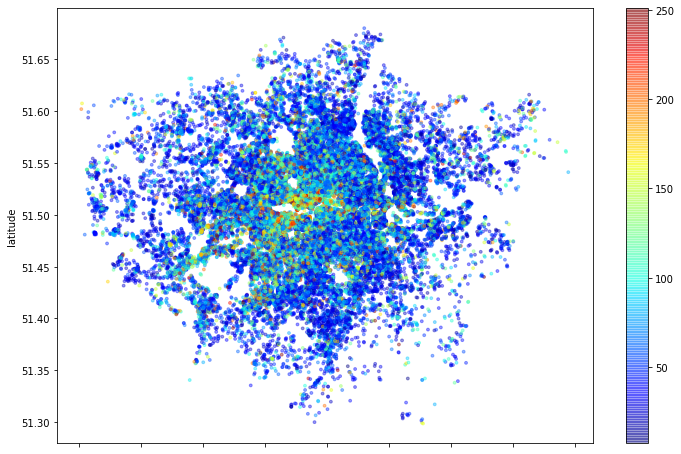

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


Por efeito de curiosidade, os pontos mais "quentes", são aqueles onde estão localizadas as principais atrações de Londres.

## Conclusões


O objetivo desta análise foi conhecer e entender um pouco mais sobre as propriedades do Airbnb na cidade de Londres, onde conseguimos abordar temas como dados ausentes, *outliers*, cidades com poucas entradas, distribuição de dados através de histogramas, correlação de variáveis e média de preços dos bairros mais caros e mais baratos.  